исследование на тему:

<H1>Определение перспективного тарифа для компании телеком: <br> какой тариф приносит больше прибыли? </H1>

# Оглавление
1. [Получение данных](#step_1)
2. [Предобработка данных](#step_2)
3. [Анализ и предобработка таблицы звонков](#step_3)
4. [Анализ и предобработка таблицы интернет-трафика](#step_4)
5. [Анализ и предобработка таблицы отправленных sms-сообшений](#step_5)
6. [Расчитаем помесячную выручку с каждого абонента](#step_6)
7. [Анализ данных по отдельным услугам тарифов: дисперсия и стандартное отклонение](#step_7)
8. [Рассмотрим первый вопрос: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается?](#step_8)
9. [Рассмотрим второй вопрос: отличаются ли расходы абонентов из Москвы от других абонентов?](#step_9)
10. [Заключение и выводы](#step_10)


Для начала импортируем датасеты, и получим общее представление о качестве представленной информации, Проведем предобработку каждой таблицы сразу и последовательно перейдем к следующей.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt

<H3>Анализ и предобработка таблицы тарифных планов</H3> <a name="step_1"></a>

Проанализируем качесвто представленной информации в таблице тарифных планов.

In [2]:
tariffs_df = pd.read_csv('/datasets/tariffs.csv')
tariffs_df

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [3]:
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Наименование столбцов соответвует код-стайлу, типы данных соответвуют информации содержащейся в столбцах, пропущенные значения отсутсвуют.

<H3>Анализ и предобработка таблицы абонентов</H3><a name="step_2"></a>

Проанализируем качесвто представленной информации в таблице с персональными данными об абонентах.

In [4]:
users_df = pd.read_csv('/datasets/users.csv')
users_df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Исправим тип данных в поле даты и проверим типы данных еще раз.

In [6]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [7]:
users_df.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [8]:
users_df.duplicated().sum()

0

In [9]:
users_df.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

462 пропущенных значения в столбце "churn_date" (Дата прекращения договора с абонентом), объясняется тем, что на момент выгрузки данных, 462 абонента еще являлись дейсвтующими абонентами. Наименование столбцов соответвует код-стайлу, типы данных соответвуют информации содержащейся в столбцах, дубликаты отсутсвуют.

Определим для последующих расчетов среднемесячных расходов срок пребывания каждого абонента на выбранном тарифе.

In [10]:
def defind_tariff(row):
    s = str(row['churn_date']) # проанализиурем значение из столбца окончания действия договора в переменную
    if s != 'NaT':             # если не "nan" - договор расторгнут
        return row['churn_date'].month - row['reg_date'].month # из даты расторжения договора вычитаем дату регистрации
    if s == 'NaT':             # если договор еще действует, 
        return 13 - int(row['reg_date'].month) # из 13 вычтем месяц регистрации чтобы получить срок его пребывания на тарифе
    else:
        return 0
    
users_df['term_of_use_tariff'] = users_df.apply(defind_tariff, axis=1) # сколько месяцев абонент пользуется тарифом
users_df.head(5) # проверим

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,term_of_use_tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,7
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,5
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,8


<H3>Анализ и предобработка таблицы звонков</H3>

Изучим качество данных в таблице совершенных звонков абонентов.

In [11]:
calls_df = pd.read_csv('/datasets/calls.csv')
calls_df.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


На наш взгляд, отсутвие обозначений в таблице либо описания в совпроводительной информации каким образом обозначется входящий и исходящий звонок, является недостатком в предоставленных данных, что может повлиять на корректность исследования. 

In [12]:
calls_df.duplicated().sum()

0

In [13]:
calls_df.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [14]:
calls_df.query('duration == 0.00').count() /len(calls_df.duration) * 100

id           19.551644
call_date    19.551644
duration     19.551644
user_id      19.551644
dtype: float64

**19.55 % звонков (39613 шт.) имеют нулевую продолжительность.** Это могут быть либо пропущенные, либо входящие звонки. Так как в любом случае, эти позиции не тарифицицуруются, не считаем необходимым обрабатывать нулевые значения и находим целесообразным **удалить эти наблюдения**.

In [15]:
calls_df = calls_df.drop(calls_df.query('duration == 0.00').index)
calls_df.head(5)

,id,call_date,duration,user_id
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000


С учетом осбенностей тарификации звонков, когда каждая неполная минута округляется в большую сторону, произведем в таблице соответсвующие округления в большую сторону.

In [16]:
calls_df.duration = np.ceil(calls_df.duration)
calls_df

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


In [17]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null object
duration     162994 non-null float64
user_id      162994 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Исправим тип данных в поле даты** и проверим типы данных еще раз.

In [18]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Изменим тип данных в графе продолжительности звонков на целочисленный.

In [19]:
calls_df.duration = calls_df.duration.astype('int')
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [20]:
calls_df.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Наименование столбцов соответвует код-стайлу, типы данных соответвуют информации содержащейся в столбцах, дубликаты отсутсвуют, пропущенные значения отсутсвуют.

Произведем предварительную группировку данных **по месяцам** и произведем предварительные расчеты: **количество сделанных звонков и израсходованных минут** для каждого абонента по состоянию на конец месяца.

In [21]:
calls_df['month'] = calls_df['call_date'].dt.month # определим отдельно месяц для каждого звонка
# потом сгруппируем по людям и месяцам
calls_df = calls_df.groupby(['user_id', 'month']).agg({'duration': 'sum', 'id': 'count'}).reset_index()
calls_df.columns = ['user_id', "month", "duration", "calls"]

In [22]:
calls_df

,user_id,month,duration,calls
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46
...,...,...,...,...
3163,1498,10,247,30
3164,1499,9,70,8
3165,1499,10,449,44
3166,1499,11,612,62


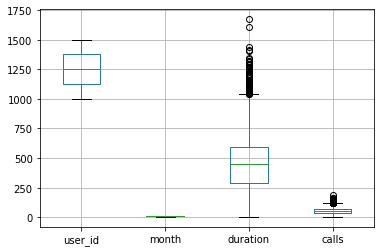

In [23]:
calls_df.boxplot()

<a name='step_4'></a>

<H3>Анализ и предобработка таблицы интернет-трафика </H3>

Изучим таблицу израсходованного трафика абонентами на предмет качества предоставленных данных.

In [24]:
internet_df = pd.read_csv('/datasets/internet.csv')
internet_df

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [25]:
internet_df.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [26]:
internet_df.query('mb_used == 0.00').count() /len(internet_df.mb_used) * 100

Unnamed: 0      13.118156
id              13.118156
mb_used         13.118156
session_date    13.118156
user_id         13.118156
dtype: float64

13.11% интернет-соединений (19598 шт.) не потребляли трафик, что является странным, так как операторами учитывается и входящий и исходящий трафик. Так как в любом случае, эти позиции не тарифицицуруются, не считаем необходимым обрабатывать нулевые значения и находим целесообразным удалить эти наблюдения.

In [27]:
internet_df = internet_df.drop(internet_df.query('mb_used == 0.00').index)
internet_df.tail(5) # проверим, что нулевые значения отсутсвуют, в частности индекс 149394

,Unnamed: 0,id,mb_used,session_date,user_id
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Учитывая особенности тарификации интернет-трафика (каждый неполный мегабайт округляется в большую сторону), произведем соответсвующие округления. 

In [28]:
internet_df.mb_used = internet_df.mb_used.apply(np.ceil)
internet_df.tail(5)

,Unnamed: 0,id,mb_used,session_date,user_id
149390,149390,1499_151,753.0,2018-10-11,1499
149391,149391,1499_152,319.0,2018-10-03,1499
149392,149392,1499_153,491.0,2018-12-14,1499
149394,149394,1499_155,1247.0,2018-11-26,1499
149395,149395,1499_156,545.0,2018-10-26,1499


In [29]:
internet_df.duplicated().sum()

0

In [30]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null object
user_id         129798 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.9+ MB


Исправим тип данных в поле даты и проверим типы данных еще раз.

In [31]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.9+ MB


In [32]:
internet_df.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Наименование столбцов соответвует код-стайлу, типы данных соответвуют информации содержащейся в столбцах, пропущенные значения отсутсвуют.

Сгруппируем объем израсходованного интернет-трафика по месяцам.

In [33]:
internet_df = internet_df.groupby(['user_id', pd.Grouper(key="session_date", freq="M")]).agg({'id': 'count', 'mb_used': 'sum'}).reset_index()
internet_df.columns = ['user_id', "date", "sessions", "mb_used"] # freq="M", Y будет на конец года, W на конец недели
internet_df['month'] = internet_df.date.dt.month # определим отдельно месяц для каждого соединения

internet_df = internet_df.loc[:, ['user_id', 'month', 'sessions', 'mb_used']]
internet_df

,user_id,month,sessions,mb_used
0,1000,5,4,2256.0
1,1000,6,44,23257.0
2,1000,7,28,14016.0
3,1000,8,27,14070.0
4,1000,9,25,14581.0
...,...,...,...,...
3196,1498,10,49,20604.0
3197,1499,9,4,1848.0
3198,1499,10,43,17809.0
3199,1499,11,39,17984.0


<a name='step_5'></a>

<H3>Анализ и предобработка таблицы отправленных смс-сообщений</H3>

Проанализируем качество представленной информации об отправленных смс-сообщениях абонентами.

In [34]:
messages_df = pd.read_csv('/datasets/messages.csv')
messages_df

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [35]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Исправим тип данных в поле даты и проверим типы данных еще раз.

In [36]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [37]:
messages_df.duplicated().sum()

0

In [38]:
messages_df.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

Наименование столбцов соответвует код-стайлу, типы данных соответвуют информации содержащейся в столбцах, дубликаты отсутсвуют, пропущенные значения отсутсвуют.

Сгруппируем количество отправленных сообщений по месяцам.

In [39]:
messages_df = messages_df.groupby(['user_id', pd.Grouper(key="message_date", freq="M")]).agg({'id': 'count'}).reset_index()
messages_df.columns = ['user_id', "date", "sms"] # freq="M", Y будет на конец года, W на конец недели
messages_df['month'] = messages_df.date.dt.month # определим отдельно месяц для каждого сообщения 

messages_df = messages_df.loc[:, ['user_id', 'month', 'sms']]
messages_df

,user_id,month,sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


<a name='step_6'></a>

<H3>Рассчитаем помесячную выручку с каждого абонента</H3>

Рассчитаем помесячную выручку с каждого абонента (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [40]:
tariffs_df

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [41]:
tariffs_df.rename(columns = {'tariff_name':'tariff'}, inplace = True)
tariffs_df

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для того чтобы выяснить, какой конкретно абонент сколько конкретно тратит, необходимо выяснить каким он полуьзуется тарифом, и какова стоимость дополнительных услуг в зависимости от тарифа. Для этого объединим в таблицу, которая будет в себя включать информацию сгруппирвоанную по месяца о количестве и продолжительности их звонков, количество интернет интернет соединений и потребленного интернет-трафика, количество израсходованных смс для дальнейшего определения расходов в совокупности. <a name="step_4"></a>

In [42]:
general_df = calls_df.merge(messages_df, on=['user_id', 'month'], how='outer')
general_df = general_df.merge(internet_df, on=['user_id', 'month'], how='outer')

general_df = general_df.merge(users_df, on='user_id', how='outer')

general_df = general_df.merge(tariffs_df, on='tariff', how='left') 
general_df.info()

general_df = general_df.reindex(columns=['user_id', 'reg_date', 'term_of_use_tariff', 'first_name', 'last_name', 'age', 'city', 'tariff', 'rub_monthly_fee', 'month', 'minutes_included', 'calls', 'duration', 'rub_per_minute', 'messages_included', 'sms', 'rub_per_message', 'mb_per_month_included', 'sessions', 'mb_used', 'rub_per_gb'])
general_df = general_df.drop('age', axis=1) # чтобы отображалась более значимыен столбцы (лимит 20 колонок)

general_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
duration                 3168 non-null float64
calls                    3168 non-null float64
sms                      2717 non-null float64
sessions                 3201 non-null float64
mb_used                  3201 non-null float64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
term_of_use_tariff       3216 non-null int64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_p

,user_id,reg_date,term_of_use_tariff,first_name,last_name,city,tariff,rub_monthly_fee,month,minutes_included,calls,duration,rub_per_minute,messages_included,sms,rub_per_message,mb_per_month_included,sessions,mb_used,rub_per_gb
0,1000,2018-05-25,8,Рафаил,Верещагин,Краснодар,ultra,1950,5.0,3000,17.0,159.0,1,1000,22.0,1,30720,4.0,2256.0,150
1,1000,2018-05-25,8,Рафаил,Верещагин,Краснодар,ultra,1950,6.0,3000,28.0,172.0,1,1000,60.0,1,30720,44.0,23257.0,150
2,1000,2018-05-25,8,Рафаил,Верещагин,Краснодар,ultra,1950,7.0,3000,41.0,340.0,1,1000,75.0,1,30720,28.0,14016.0,150
3,1000,2018-05-25,8,Рафаил,Верещагин,Краснодар,ultra,1950,8.0,3000,42.0,408.0,1,1000,81.0,1,30720,27.0,14070.0,150
4,1000,2018-05-25,8,Рафаил,Верещагин,Краснодар,ultra,1950,9.0,3000,46.0,466.0,1,1000,57.0,1,30720,25.0,14581.0,150


In [43]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
reg_date                 3216 non-null datetime64[ns]
term_of_use_tariff       3216 non-null int64
first_name               3216 non-null object
last_name                3216 non-null object
city                     3216 non-null object
tariff                   3216 non-null object
rub_monthly_fee          3216 non-null int64
month                    3214 non-null float64
minutes_included         3216 non-null int64
calls                    3168 non-null float64
duration                 3168 non-null float64
rub_per_minute           3216 non-null int64
messages_included        3216 non-null int64
sms                      2717 non-null float64
rub_per_message          3216 non-null int64
mb_per_month_included    3216 non-null int64
sessions                 3201 non-null float64
mb_used                  3201 non-null float64
rub_per_gb   

Выясним сколько каждый абонент заплатил за ту или иную услугу на каждом из тарифов при превышении включенного пакета услуг.

In [44]:
def calculate_min(row):
    return max((row['duration'] - row['minutes_included']), 0) * row['rub_per_minute']
     
def calculate_sms(row):
     max((row['sms'] - row['messages_included']), 0) * row['rub_per_message']
        
def calculate_mb(row):                                                         
    if row['mb_used'] <= row['mb_per_month_included']: # 
        return 0
    if row['mb_used'] > row['mb_per_month_included']:
        overspending_mb = (row['mb_used'] - row['mb_per_month_included']) # так как доплата установлена за ГБ, то чтоб 
        return math.ceil(overspending_mb / 1024) *row['rub_per_gb']
    
general_df['min_over_profit_rub'] = general_df.apply(calculate_min, axis=1) # формируем столбцы перерасхода пакетов в рублях
general_df['sms_over_profit_rub'] = general_df.apply(calculate_sms, axis=1) # куда и будем возвращать значения из функций
general_df['mb_over_profit_rub'] = general_df.apply(calculate_mb, axis=1)

general_df.head(5)

,user_id,reg_date,term_of_use_tariff,first_name,last_name,city,tariff,rub_monthly_fee,month,minutes_included,...,messages_included,sms,rub_per_message,mb_per_month_included,sessions,mb_used,rub_per_gb,min_over_profit_rub,sms_over_profit_rub,mb_over_profit_rub
0,1000,2018-05-25,8,Рафаил,Верещагин,Краснодар,ultra,1950,5.0,3000,...,1000,22.0,1,30720,4.0,2256.0,150,0.0,None,0.0
1,1000,2018-05-25,8,Рафаил,Верещагин,Краснодар,ultra,1950,6.0,3000,...,1000,60.0,1,30720,44.0,23257.0,150,0.0,None,0.0
2,1000,2018-05-25,8,Рафаил,Верещагин,Краснодар,ultra,1950,7.0,3000,...,1000,75.0,1,30720,28.0,14016.0,150,0.0,None,0.0
3,1000,2018-05-25,8,Рафаил,Верещагин,Краснодар,ultra,1950,8.0,3000,...,1000,81.0,1,30720,27.0,14070.0,150,0.0,None,0.0
4,1000,2018-05-25,8,Рафаил,Верещагин,Краснодар,ultra,1950,9.0,3000,...,1000,57.0,1,30720,25.0,14581.0,150,0.0,None,0.0


<a name='step_7'></a>

<h3> Анализ данных по отдельным услугам тарифов: дисперсия, стандартное отклонение.</h3>

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

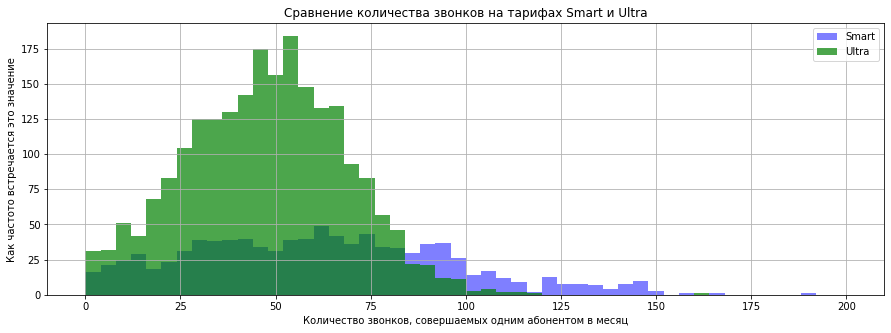

In [45]:
general_df.query('tariff == "ultra"')['calls'].hist(color= 'b', range = (0,200), bins = 50, alpha = 0.5, label = 'Smart', figsize=(15, 5))    
general_df.query('tariff == "smart"')['calls'].hist(color= 'g', range = (0,200), bins = 50, alpha = 0.7, label = 'Ultra')

plt.legend()
plt.xlabel('Количество звонков, совершаемых одним абонентом в месяц')
plt.ylabel('Как частото встречается это значение')
plt.title('Сравнение количества звонков на тарифах Smart и Ultra');

In [46]:
general_df.pivot_table(index = ['tariff'], values = 'duration', 
                       aggfunc = ['count', 'mean', np.var, np.std] )

,count,mean,var,std
,duration,duration,duration,duration
tariff,,,,
smart,2221,419.440342,35718.128534,188.992403
ultra,947,547.755016,93338.428291,305.513385


Проанализировав количество и продолжительность звонков, мы можем сделать вывод, что на тарифе Smart абонент совершает в среднем 25-75 звонков в месяц, общая продолжительность разговоров составила 2221 минуту, в среднем по 419 минут на каждого абонента, дисперсия 35718 - почти в три раза меньше, чем на трифе Ultra (93338). Случайный абонент на тарифе Smart в три раза вероятнее совершит более двухсот звонков по 419 минут, чем абонент тарифа Ultra по 547 минут. На тарифе Ultra разброс значений в три раза выше - сложнее прогнозировть. Гистограмма тарифа Ultra имеет скошенность вправо, а значит медиана меньше среднего.

In [47]:
ultra_sms = general_df.query('tariff == "ultra"')['duration'].dropna()
smart_sms = general_df.query('tariff == "smart"')['duration'].dropna()

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(ultra_sms, smart_sms)  # ind - для двух выборок
                                            # 1samp - (1 выборка, 1 число) проверяет вероятность получить число
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.073300391997267e-45
Отвергаем нулевую гипотезу


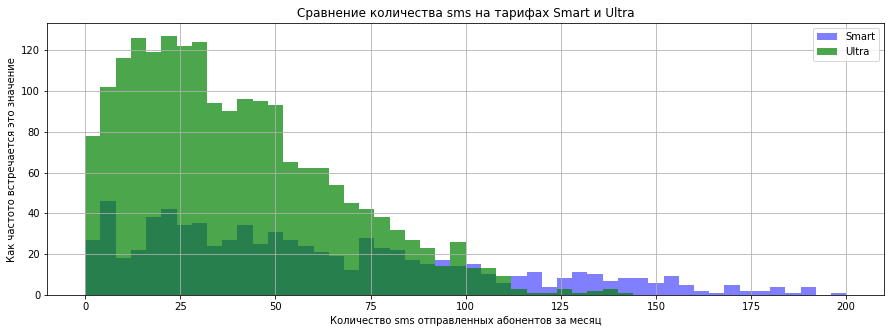

In [48]:
general_df.query('tariff == "ultra"')['sms'].hist(color= 'b', range = (0,200), bins = 50, alpha = 0.5, label = 'Smart', figsize=(15, 5))    
general_df.query('tariff == "smart"')['sms'].hist(color= 'g', range = (0,200), bins = 50, alpha = 0.7, label = 'Ultra')

plt.legend()
plt.xlabel('Количество sms отправленных абонентов за месяц')
plt.ylabel('Как частото встречается это значение')
plt.title('Сравнение количества sms на тарифах Smart и Ultra');

In [49]:
general_df.pivot_table(index = ['tariff'], values = 'sms', 
                       aggfunc = ['count', 'mean', np.var, np.std] )

,count,mean,var,std
,sms,sms,sms,sms
tariff,,,,
smart,1922,38.716441,717.594201,26.787949
ultra,795,61.161006,2109.659183,45.931026


Абоненты тарифа Smart в среднем отправляют 38-50 смс в месяц. Абоненты тарифа Ultra в среднем отправляется в два раза большесмс , но значеия доходят и до 120 смс. Дисперсия на тарифе Ultra в три раза больше - 2109, стандартное отклонение практически в два раза выше - 45. Гистограмма тарифа Ultra имеет скошенность вправо, а значит медиана меньше среднего.

In [50]:
ultra_sms = general_df.query('tariff == "ultra"')['sms'].dropna()
smart_sms = general_df.query('tariff == "smart"')['sms'].dropna()

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(ultra_sms, smart_sms)  # ind - для двух выборок
                                            # 1samp - (1 выборка, 1 число) проверяет вероятность получить число
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.5802446225036298e-54
Отвергаем нулевую гипотезу


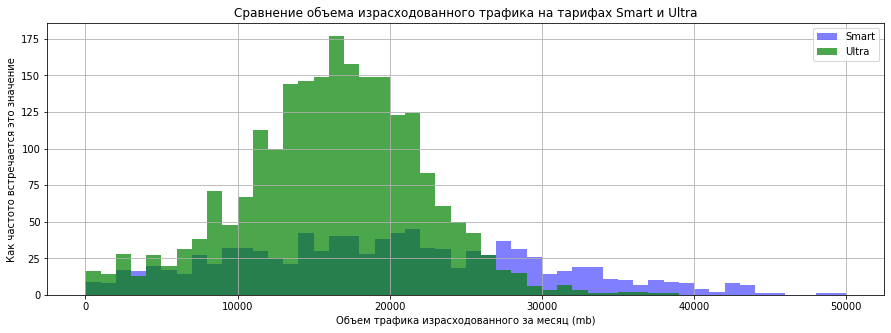

In [51]:
general_df.query('tariff == "ultra"')['mb_used'].hist(color= 'b', range = (0,50000), bins = 50, alpha = 0.5, label = 'Smart', figsize=(15, 5))   
general_df.query('tariff == "smart"')['mb_used'].hist(color= 'g', range = (0,50000), bins = 50, alpha = 0.7, label = 'Ultra')

plt.legend()
plt.xlabel('Объем трафика израсходованного за месяц (mb)')
plt.ylabel('Как частото встречается это значение')
plt.title('Сравнение объема израсходованного трафика на тарифах Smart и Ultra');

In [52]:
general_df.pivot_table(index = ['tariff'], values = 'sessions', 
                       aggfunc = ['count', 'mean', np.var, np.std] )

,count,mean,var,std
,sessions,sessions,sessions,sessions
tariff,,,,
smart,2227,42.081724,217.870227,14.760428
ultra,974,37.045175,341.264144,18.473336


Объем трафика на тарифе Ultra расходуется в основном в пределах 10.000-20.100 МБ. максимальный диапазон достигает примерно 35.000 МБ, дисперсия - 341. У абонентов тарифа Smart объем израсходованного трафика может достигать 50.000 МБ, дисперсия ниже - 217. Распределения на гистограмме имеет практически нормальный вид.

In [53]:
ultra_internet = general_df.query('tariff == "ultra"')['sessions'].dropna()
smart_internet = general_df.query('tariff == "smart"')['sessions'].dropna()

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(ultra_internet, smart_internet)  # ind - для двух выборок
                                            # 1samp - (1 выборка, 1 число) проверяет вероятность получить число
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.3348043607521516e-16
Отвергаем нулевую гипотезу


Повоедение на обоих тарифах по всем трем видам услуг отличаются и не являются похожим и равным.

<a name='step_8'></a>

<H3>Рассмотрим первый вопрос: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается?</H3>

* H0 = средняя выручка пользователей не различается;
* H1 = средняя выручка пользователей различается.

Рассчитаем средний ежемесячный чек абонента на каждом из тарифов, и узнаем сколько в среднем тратит абонент на том или ином тарифе. Для начала сформируем новую таблицу и посчитаем сколько абонент заплатил абонентской платы за пакет включенных услуг, и сколько он потратил сверх включенного пакета на смс, звонки и интернет, сумируем все показатели и разделим на количество абонентов на каждом из тарифов.  <a name="step_5"></a>

In [54]:
# сгруппируем таблицу по наименованию тарифов и суммируем расходы абонента: абонплата, дополнительные минуты, смс, мегабайты
everage_person = general_df.pivot_table(index='tariff', values=['rub_monthly_fee', 'min_over_profit_rub', 'sms_over_profit_rub',
                                                                'mb_over_profit_rub'], aggfunc='sum')
everage_person['total_profit_rub'] = everage_person.loc[:, ['rub_monthly_fee', 'min_over_profit_rub', 'sms_over_profit_rub', 
                                                            'mb_over_profit_rub']].sum(axis=1)

# посчитаем абонентов на тарифах смарт и ультра: измерим кол-во упоминаний смарта в столбце тариф, и соответсевнно для ультра
everage_person.loc['smart', 'users_on_tariff'] = len(users_df[users_df['tariff'] == 'smart'])
everage_person.loc['ultra', 'users_on_tariff'] = len(users_df[users_df['tariff'] == 'ultra'])

# высчитаем средний чек каждого абонента в месяц: разделим общую выручку с тарифа на количество абонентов
everage_person['average_year_check'] =  round(everage_person['total_profit_rub'] / everage_person['users_on_tariff'], 2)
everage_person['average_month_check'] =  round(everage_person['average_year_check'] / 12, 2)
everage_person

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,mb_over_profit_rub,min_over_profit_rub,rub_monthly_fee,total_profit_rub,users_on_tariff,average_year_check,average_month_check
tariff,,,,,,,
smart,1342800.0,278217.0,1226500,2847517.0,351.0,8112.58,676.05
ultra,119250.0,0.0,1922700,2041950.0,149.0,13704.36,1142.03


Проанализировав данные, мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу: Средний чек абонентов различается практически в 2 раза.

Итого сердняя выручка в месяц с каждого абонента на тарифе "Smart" составила 676,05 руб., а на тарифе "Ultra" - 1142,03 руб. При том, что каждый абонент на тарифе "Ultra" приносит на 40% больше прибыли компании, этим тарифом пользуется в 2 раза меньше человек. Поэтому на данный моент, суммарная выручка за 2018 год от всех абонентов тарифа "Smart" составляет 2,847 млн. руб., против 2,041 млн.руб. на трифе "Ultra". Таким образом, существует выбор: продвигать более популярный тариф, который приносит прибыль за счет большей привлекательности для абонентов в общем объеме ("Smart") или более дорогой тариф и более прибыльный тариф для комнании ("Ultra") - решать руководству, но мы считаем целесообразно продвигать тариф "Ultra".

<a name='step_9'></a>

<H3>Рассмотрим второй вопрос: отличаются ли расходы абонентов из Москвы от других абонентов?</H3>

* H0 = расходы москвичей не отличаются от расходов абонентов из других регионов;
* H1 = расходы москвичей отличаются от расходов абонентов из других регионов;

In [55]:
everage_person = general_df.pivot_table(index='city', values=['rub_monthly_fee', 'min_over_profit_rub', 'sms_over_profit_rub',
                                                                'mb_over_profit_rub'], aggfunc='sum')
everage_person['Общие расходы'] = everage_person.loc[:, ['rub_monthly_fee', 'min_over_profit_rub', 'sms_over_profit_rub', 
                                                            'mb_over_profit_rub']].sum(axis=1)

everage_person.head(5)

,mb_over_profit_rub,min_over_profit_rub,rub_monthly_fee,Общие расходы
city,,,,
Архангельск,8400.0,759.0,6600,15759.0
Астрахань,15000.0,3696.0,23500,42196.0
Балашиха,9000.0,5499.0,31600,46099.0
Барнаул,400.0,1014.0,25300,26714.0
Белгород,2800.0,411.0,8250,11461.0


In [56]:
moscow_users = users_df[users_df['city'] == 'Москва']['city'].count() # сосчитаем количество абонентов из Москвы
total_moscow = everage_person.loc['Москва', 'Общие расходы'] # вычленим общую сумму расходов москвичей на связь
average_moscow = round(total_moscow / moscow_users / 12, 2) # разделим общие расходы на кол-во абонентов и на 12 месяцев
print(f'{moscow_users} абонентов проживает в Москве с расходами в совокупности по городу {total_moscow} руб., \n что составляет в среднем на человека {average_moscow} руб.')

99 абонентов проживает в Москве с расходами в совокупности по городу 942937.0 руб., 
 что составляет в среднем на человека 793.72 руб.


In [57]:
users_from_regions = users_df[users_df['city'] != 'Москва']['city'].count() # посчитаем абонентов не из Москвы
total_other = everage_person['Общие расходы'].sum() - total_moscow # из расходов по всем городам вычтем расходы москвичей
average_other = round(total_other / users_from_regions / 12, 2) # разделим расходы по всем городам кроме москвы на кол-во немосквичей
print(f'{users_from_regions} абонент проживает в других городах с расходами в совокупности по этим городам {total_other} руб.,\n  что составляет в среднем на человека {average_other} руб.')

401 абонент проживает в других городах с расходами в совокупности по этим городам 3946530.0 руб.,
  что составляет в среднем на человека 820.14 руб.


Но основании проведенных расчетов, мы видим, что в среднем **москвич тратит на связь 793 руб**, а житель **из провинции 820 руб**, на основании чего следует сделать вывод, что расходы москвичей отличаются от расходов жителей из регионов, пусть и **незначительно на 3,3%**.

Для того чтобы подтвердить или опровергнуть гипотезу статистическими методами программным способом: отделим расходы москвичей и не москвичей, из стобца общих расходов по всем городам удалим расходы Москвы, чтобы оставить массив только других городов, 
а расходы Москвы уже ранее сохраниив в отельную переменную. Затем столбец с общими расходами по регионам разделим на количество пользователей в регионах и на 12 месяцев. Обозначим расходы среднего москвича в месяц как оптимальные расходы и 
гипотизу будем сравнивать с этим оптимальным значением. **Для проверки используем t-критерий Стьюдента потому что выборки являются независимыми, корреляции по всем трем видам услуг, проанализированными ранее, отсутсвуют.**

In [58]:
# из стобца общих расходов по всем городам удалим расходы москвы, чтобы оставить массив только других городов, 
#а расходы москвы уже ранее вычленили в отельную переменную
everage_person = everage_person.drop(everage_person.query('city == "Москва"').index)

other_cities = everage_person['Общие расходы'] / users_from_regions / 12# вставляем сюда столбец с расходами по всем городам

optimal_value = average_moscow # среднемесячные расходы каждого москвича

alpha = 0.05

results = st.ttest_1samp(other_cities, optimal_value)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, т.е. значения не равны, превышен критический порог 0,05")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение:  1.4444542442011931e-136
Отвергаем нулевую гипотезу, т.е. значения не равны, превышен критический порог 0,05


<a name='step_10'></a>

<H3>Заключение и выводы</H3>

Итого **сердняя выручка в месяц** с каждого абонента **на тарифе "Smart" составила 676,05 руб.**, а **на тарифе "Ultra" - 1142,03 руб.** При том, что каждый абонент **на тарифе "Ultra" приносит на 40% больше прибыли компании**, этим тарифом пользуется в 2 раза меньше человек. Поэтому на данный моент, **суммарная выручка за 2018 год от всех абонентов тарифа "Smart" составляет 2,847 млн. руб., против 2,041 млн.руб. на трифе "Ultra".** Таким образом, существует выбор: продвигать более популярный тариф, который приносит прибыль за счет большей привлекательности для абонентов в общем объеме ("Smart") или более дорогой тариф и более прибыльный тариф для комнании ("Ultra") - решать руководству, но мы считаем **целесообразно продвигать тариф "Ultra".**

**В регионах тратят на связь в среднем на 3,3% больше.** Но основании проведенных расчетов, мы видим, что в среднем **москвич тратит на связь 793 руб**, а житель **из провинции 820 руб**, на основании чего следует сделать вывод, что расходы москвичей отличаются от расходов жителей из регионов, **пусть и незначительно.**